[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)

#### based on Fig. 2 from Lowe et al. 2019 (Nature Comm.)  "_Key drivers of cloud response to surface-active organics_"   
https://doi.org/10.1038/s41467-019-12982-0

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install PySDM-examples \
      notebook==`python -c "import notebook; print(notebook.__version__)"` \
      tornado==`python -c "import tornado; print(tornado.version)"`
    !ldconfig

In [2]:
from PySDM_examples.Lowe_et_al_2019 import Settings, Simulation
from PySDM_examples.utils.show_plot import show_plot
from PySDM.physics.spectra import Lognormal
from PySDM.physics import si
import numpy as np
from matplotlib import pyplot

/home/slayoo/devel/PySDM/PySDM/backends/__init__.py:29: UserWarning: CUDA library found but cuInit() failed (error code: 999; message: unknown error)
  warnings.warn(


In [3]:
output = {}
for surface_tension in ('CompressedFilm', 'Constant'):
    settings = Settings(
        dt=1*si.s, n_sd=200, 
        kappa=.6,
        surface_tension=surface_tension,
        spectrum=Lognormal(
            norm_factor=566 / si.cm**3,
            m_mode=.08 * si.um / 2,
            s_geom=2
        ))
    settings.output_interval = 25 * si.s
    
    
    simulation = Simulation(settings)
    output[surface_tension] = simulation.run()


In [4]:
# TODO #223:
# - artefacts in the spectrum
# - if kappa is low -> TOMS748 problem: not fa * fb < 0
# - passing f_org and other params to the "physics" class from Settings
# - 

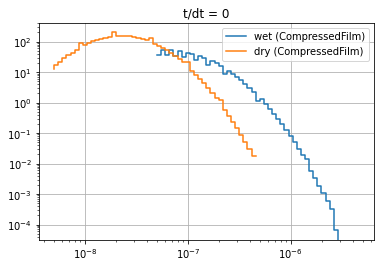

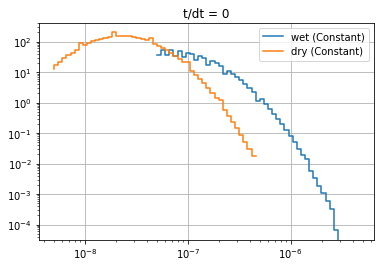

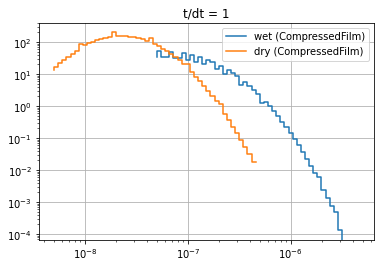

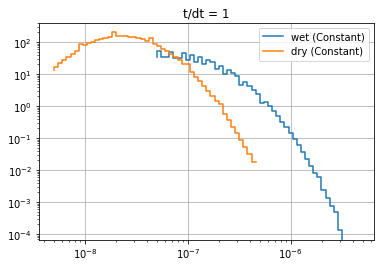

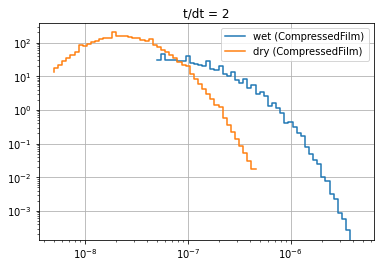

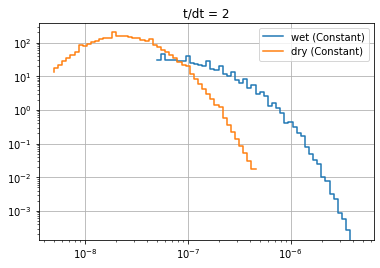

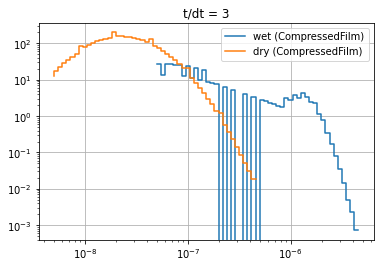

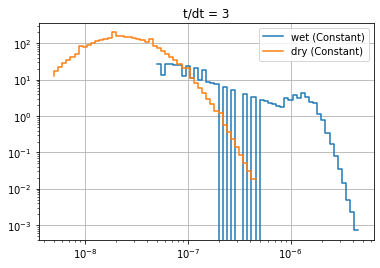

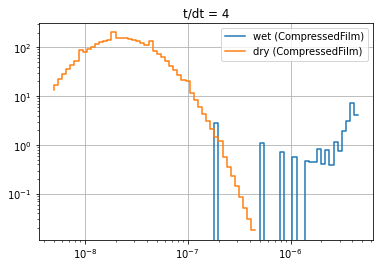

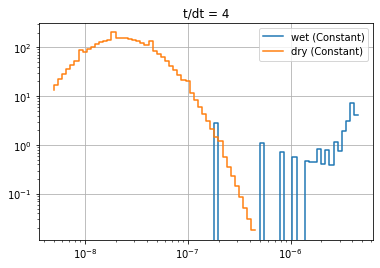

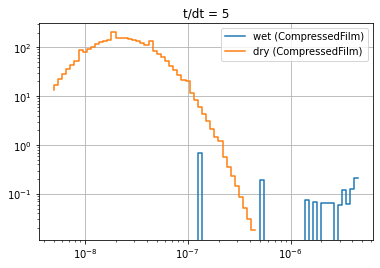

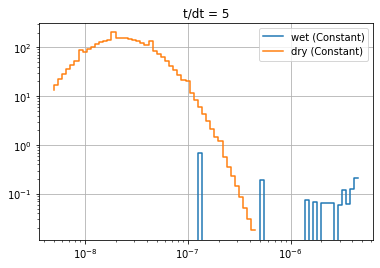

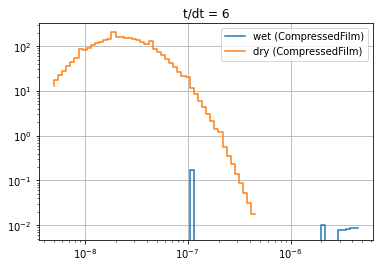

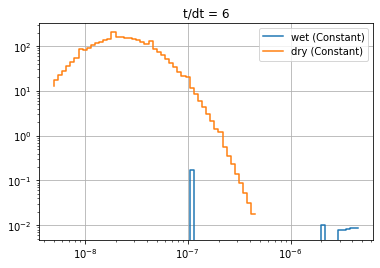

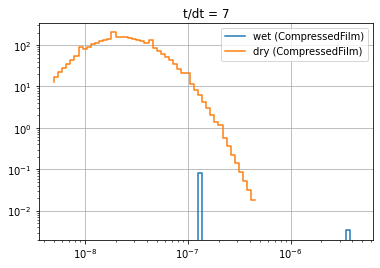

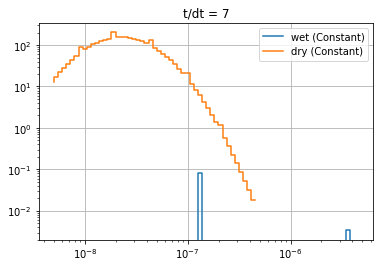

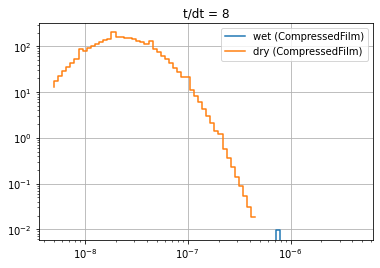

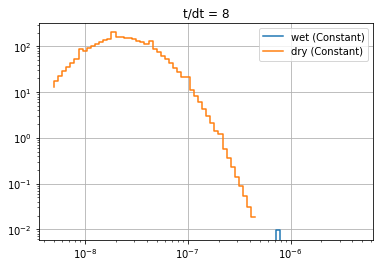

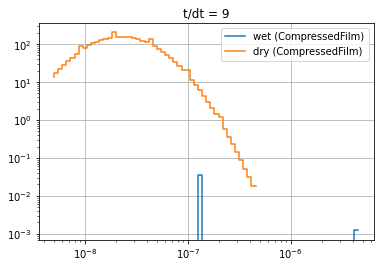

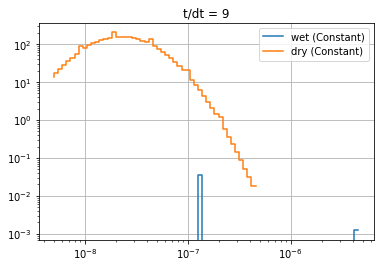

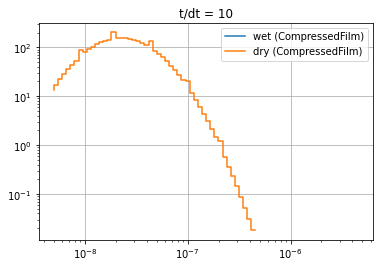

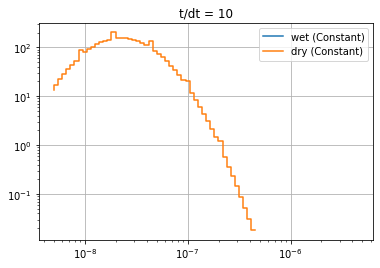

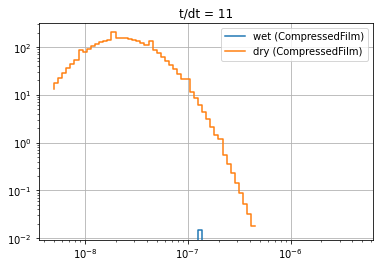

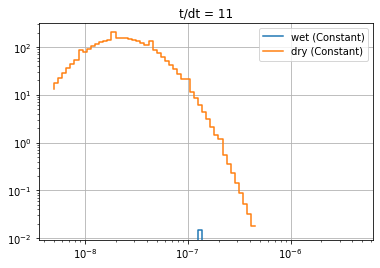

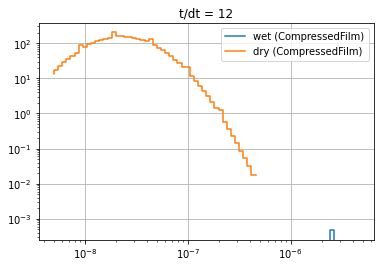

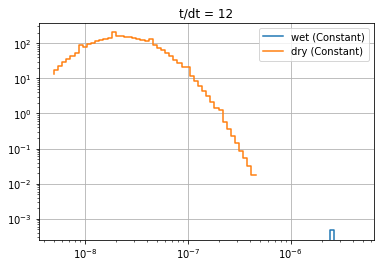

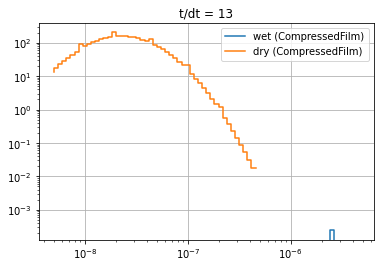

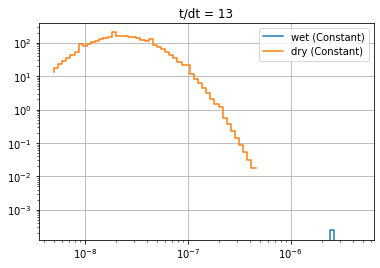

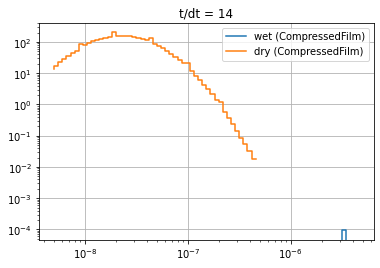

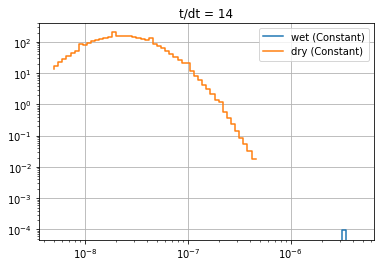

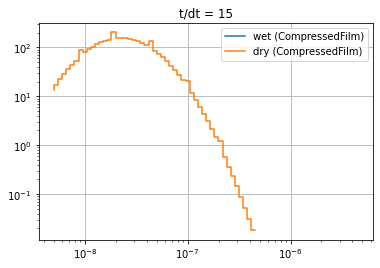

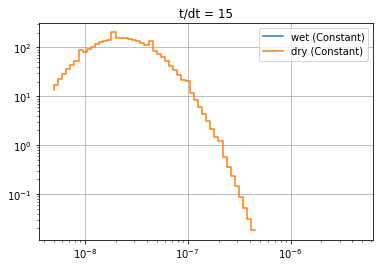

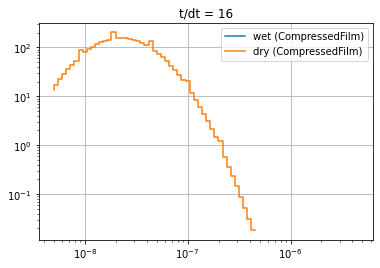

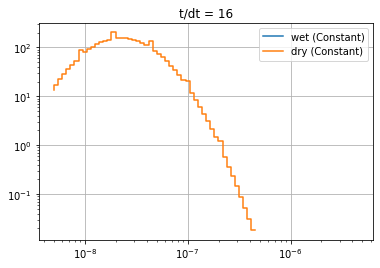

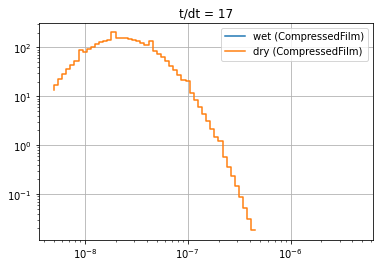

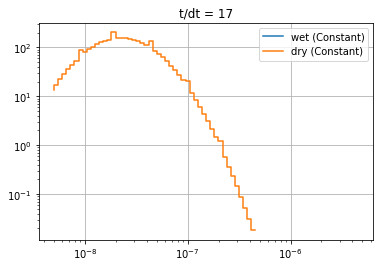

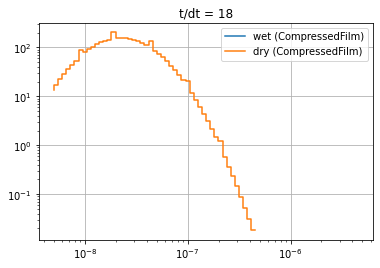

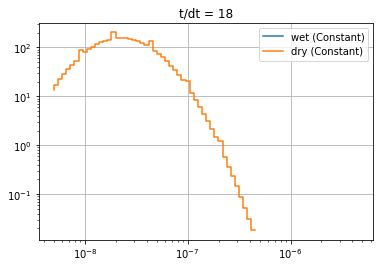

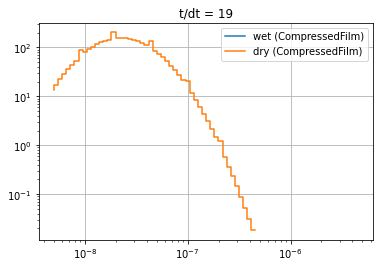

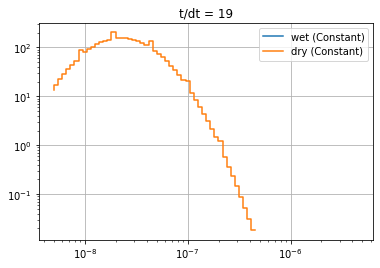

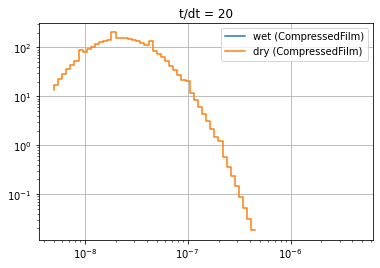

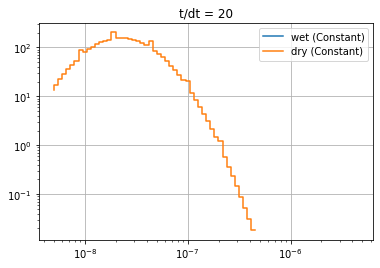

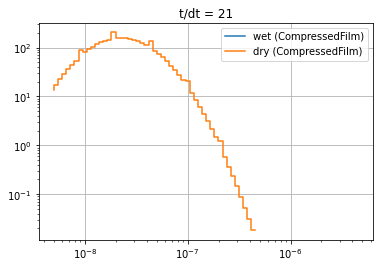

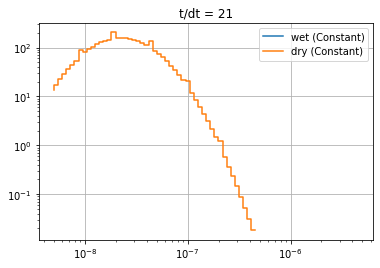

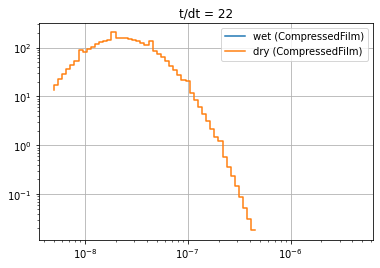

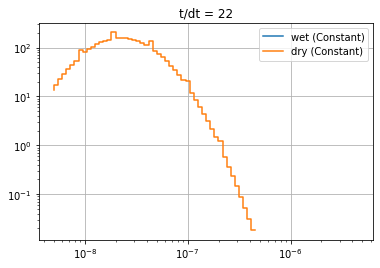

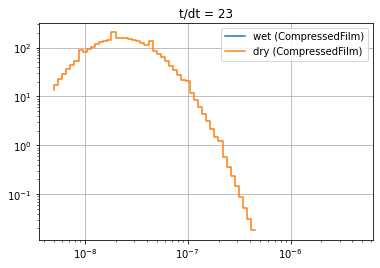

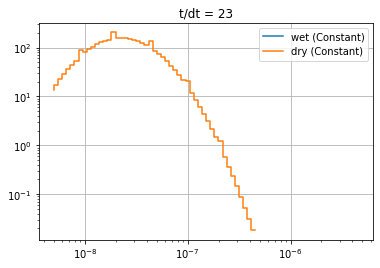

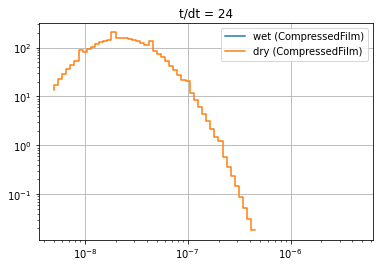

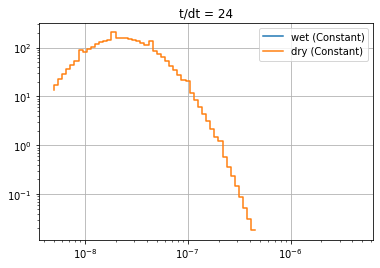

In [5]:
for record_number in range(len(output['Constant']['t'])):
    for key in output.keys():
        pyplot.step(
            settings.wet_radius_bins_edges[:-1], # TODO #223 - steps + where='mid'?
            output[key]['Particles Wet Size Spectrum'][record_number],
            label=f'wet ({key})'
        )
        pyplot.step(
            settings.dry_radius_bins_edges[:-1], # TODO #223- steps
            output[key]['Particles Dry Size Spectrum'][record_number],
            label=f'dry ({key})'
        )
        pyplot.xscale('log')
        pyplot.yscale('log')
        pyplot.legend()
        pyplot.grid()
        pyplot.title(f"t/dt = {record_number}")
        pyplot.show()

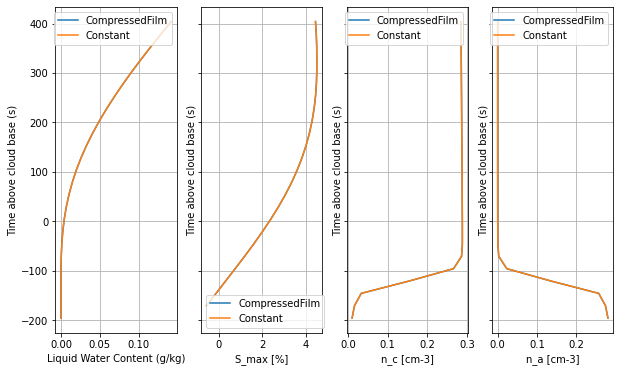

HTML(value="<a href='./tmp2zvtvx0i.pdf' target='_blank'>./tmp2zvtvx0i.pdf</a><br>")

In [6]:
figsize = (10, 6)
fig, axs = pyplot.subplots(1, 4, figsize=figsize, sharey=True)


for idx, var in enumerate(('ql', 'S_max', 'n_c_cm3', 'n_a_cm3')):
    for key in output.keys():
        Y = np.asarray(output[key]['t']) - 196 * si.s
        axs[idx].plot(output[key][var], Y, label=key)
    #axs[idx].set_ylim(0, 400 * si.s)

    axs[idx].set_ylabel('Time above cloud base (s)')
    if var == 'ql':
        axs[idx].set_xlabel('Liquid Water Content (g/kg)')
    elif var == 'S_max':
        axs[idx].set_xlabel('S_max [%]')
    elif var == 'n_c_cm3':
        axs[idx].set_xlabel('n_c [cm-3]')
    elif var == 'n_a_cm3':
        axs[idx].set_xlabel('n_a [cm-3]')
    else:
        assert False
    
for ax in axs:
    ax.grid()
    ax.legend()
show_plot()